
# Assignment No 3a
###### *Course Instructors: Dr. Hassan Raza, Mr. Ahmad Raza*
----
## Goal

Your goal in this assigment is to implement a Decision Tree Classifier.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the google classroom (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



### Decision Tree Classifier

Now in this assignment we will be implementing the Decision Classifier for both Continuous and Categorical attributes.

You will be testing your implementations with three different split criterias, namely:
 - Information Gain
 - Gini Index
 - CART 


In [2]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [1]:
class Node:
    def __init__(self,purity,klasslabel='',score=0,split=[],fidx=-1):
        self.lchild=None       
        self.rchild=None
        self.klasslabel=klasslabel        
        self.split=split
        self.score=score
        self.fidx=fidx
        self.purity=purity
        
    def set_childs(self,lchild,rchild):
        self.lchild = lchild
        self.rchild = rchild
    def isleaf(self):
        if(self.lchild is None and self.rchild is None):
            return True
    def isless_than_eq(self, X):
        return X[self.fidx] <= self.split
    def get_str(self):        
        if self.isleaf():
            return 'C(class={},Purity={})'.format(self.klasslabel,self.purity)
        else:
            return 'I(Fidx={},Score={},Split={})'.format(self.fidx,self.score,self.split)
    

In [2]:
# A placeholder class 
# TODO: You have to implement the following class, remembe4r from the lectures that you will 
# need to build a model for each different class you are trying to identify...

In [17]:
import pdb
import numpy as np
## Your code goes here...
# You might need to define auxliary classes for composition.. ?
class DecisionTree:
    ''' Implements the Decision Tree For Classification... '''
    def __init__(self, purityp, exthreshold,maxdepth=3):        
        self.purity=purityp
        self.exthreshold=exthreshold
        self.maxdepth=maxdepth
        self.tree = None
    def train(self, X, Y):
        ''' Train Decision Tree using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        nexamples,nfeatures=X.shape
        self.tree = self.build_tree(X,Y , depth=0)
        ## now go and train a model for each class...
        # YOUR CODE HERE
        #raise NotImplementedError()
        
    def build_tree(self, X, Y, depth):
        """ 
            Function is used to recursively build the decision Tree 
          
            Input
            -----
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns
            -------
            root node of the built tree...
        """
        nexamples, nfeatures = X.shape
        klasses, count = np.unique(Y, return_counts=True)
        purity = max(count) / nexamples
        print(f"Building tree at depth {depth} with purity {purity} and {nexamples} examples")
        
        if purity >= self.purity or depth >= self.maxdepth or len(Y) <= self.exthreshold:
            klasslabel = klasses[np.argmax(count)]
            return Node(purity, klasslabel=klasslabel)
        
        best_feature, best_split, best_entropy, best_Xlidx, best_Xridx = None, None, np.inf, None, None
        best_gain = 0
        
        for i in range(nfeatures):
            feat = X[:, i]
            split, entropy, Xlidx, Xridx, info_gain = self.evaluate_numerical_attribute(feat, Y)

            if info_gain > best_gain:
                best_gain = info_gain
                best_entropy = entropy
                best_feature = i
                best_split = split
                best_Xlidx, best_Xridx = Xlidx, Xridx

        if best_gain > 0:
            X_left, Y_left = X[best_Xlidx], Y[best_Xlidx]
            X_right, Y_right = X[best_Xridx], Y[best_Xridx]

            node = Node(purity, score=best_gain, split=best_split, fidx=best_feature)
            node.set_childs(
                self.build_tree(X_left, Y_left, depth + 1),
                self.build_tree(X_right, Y_right, depth + 1)
            )
            return node
        
        
    # def find_best_split(self , X , Y):
    #     best_score = 0
    #     best_feature , best_threshold , X_left , Y_left , X_right , Y_right = None
    #     for i in range(X.shape[1]):
    #         each_feature_values = X[: , i]
    #         threshold = np.unique(each_feature_values)
            
            
    #         for j in threshold:
    #             left_values = each_feature_values <= threshold
    #             right_values = each_feature_values >= threshold
                
    #             info_gain = self.information_gain(Y , Y[left_values] , Y[right_values])
                
    #             if info_gain > best_score:
    #                 best_score = info_gain
    #                 best_feature = i
    #                 best_threshold = j
    #                 X_left , Y_left = X[left_values] , Y[left_values]
    #                 X_right , Y_right = Y[right_values] , Y[right_values]
    #     return best_feature, best_threshold, best_score, X_left, Y_left, X_right, Y_right
                    
                    
    
    def information_gain(self, parent, left_values ,  right_values):    
        prob_left = len(left_values) / len(parent)
        prob_right = len(right_values) / len(parent)
        parent_impurity = self.impurity(parent)
        left_impurity = self.impurity(left_values)
        right_impurity = self.impurity(right_values)
        
        split_entropy =  prob_left*left_impurity+prob_right*right_impurity
        value = parent_impurity - split_entropy
        
        
        return value , split_entropy
        # info_gain = parent_impurity - (prob_left * left_impurity + prob_right * right_impurity)
        # return info_gain
        
        
    def impurity(self , y):
        values , counts = np.unique(y , return_counts=True)
        prob = counts / len(y)
        return -np.sum(prob * np.log2(prob))
    
        
        
    def test(self, X):
        
        ''' Test the trained classifiers on the given set of examples 
        
                   
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
        '''
        
        nexamples, nfeatures=X.shape
        pclasses=self.predict(X)
        
        # your code go here...
        
        return np.array(pclasses)
    def evaluate_numerical_attribute(self, feat, Y):
        """
        Evaluates the numerical attribute for all possible split points for
        possible feature selection based on information gain.

        Input:
        ---------
        feat: a continuous feature (1D array of values for a specific feature across all samples)
        Y: labels

        Returns:
        ----------
        split: best splitting threshold
        info_gain: best splitting score based on information gain
        Xlidx: indices of examples belonging to left child node
        Xridx: indices of examples belonging to right child node
        """
        # Sorting the feature and corresponding labels
        sidx = np.argsort(feat)
        sorted_feat = feat[sidx]  # sorted feature values
        sorted_Y = Y[sidx]        # sorted labels corresponding to feature values
        
        min_entropy = 0
        best_gain = 0
        best_split = None
        Xlidx, Xridx = None, None
        
        for j in range(1 , len(sorted_feat)):
            if sorted_feat[j] == sorted_feat[j-1]:
                continue
            
            threshold = (sorted_feat[j] + sorted_feat[j-1]) / 2
            # Split data based on the threshold
            left_mask = sorted_feat < threshold
            right_mask = sorted_feat >= threshold

            left_Y = sorted_Y[left_mask]
            right_Y = sorted_Y[right_mask]

            # Calculate information gain
            info_gain , split_entropy = self.information_gain(Y, left_Y, right_Y)

            # Check if this split has the best gain so far
            if info_gain > best_gain:
                best_gain = info_gain
                best_split = threshold
                min_entropy = split_entropy
                Xlidx, Xridx = np.where(left_mask)[0], np.where(right_mask)[0]  # Indices of left and right splits

        return best_split, min_entropy, Xlidx, Xridx , best_gain


    def predict(self, X):
        
        """
        Test the trained classifiers on the given example X
        
                   
            Input:
            ------
            X: [1 x d] a d-dimensional test example.
           
            Returns:
            -----------
                pclass: the predicted class for the given example, i.e. to which it belongs
        """
        z=[]            
        
        for idx in range(X.shape[0]):
            
            z.append(self._predict(self.tree,X[idx,:]))
        
        return z 
    
    def _predict(self,node, X):
        if node.isleaf():
            return node.klasslabel
        if node.isless_than_eq(X):
            return self._predict(node.lchild, X)
        else:
            return self._predict(node.rchild, X)
        # YOUR CODE HERE
        #raise NotImplementedError()
        
    def __str__(self):
        
        return self.__print(self.tree)        
        
     
    def find_depth(self):
        if self.tree is None:
            print("Tree has not been trained yet!")
            return 0
        return self._find_depth(self.tree)
    
    
    def _find_depth(self,node):
        if not node:
            return
        if node.isleaf():
            return 1
        else:
            return max(self._find_depth(node.lchild),self._find_depth(node.rchild))+1
        
        
    def __print(self,node,depth=0):
        if node is None:
            return ""
    
        ret = ""

        # Print right branch
        if node.rchild:
            ret += self.__print(node.rchild,depth+1)

        # Print own value
        
        ret += "\n" + ("    "*depth) + node.get_str()

        # Print left branch
        if node.lchild:
            ret += self.__print(node.lchild,depth+1)
        
        return ret

In [18]:

# values , counts = np.unique(Y , return_counts=True)
# prob = counts / len(Y)
# prob


In [19]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

In [20]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [21]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape )  


 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [22]:
print (Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [23]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print (Y, len(Y), np.unique(Y))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

### Debugging Tip
You can import pdb and call its function set_trace (i.e pdb.set_trace()) any where in your code to stop the execution of your code and inspect it line by line by using pdf. Otherwise, you can use Pycharm GUI debugger.

In [15]:

# import pdb 
# pdb.set_trace()

In [16]:
np.sum((X[:,0]<=5.45) & (Y=='Iris-versicolor'))

np.int64(7)

In [17]:
print (['{:0.5}'.format(p) for p in X[:,0]])

['4.9', '4.7', '4.6', '5.0', '5.4', '4.6', '5.0', '4.4', '4.9', '5.4', '4.8', '4.8', '4.3', '5.8', '5.7', '5.4', '5.1', '5.7', '5.1', '5.4', '5.1', '4.6', '5.1', '4.8', '5.0', '5.0', '5.2', '5.2', '4.7', '4.8', '5.4', '5.2', '5.5', '4.9', '5.0', '5.5', '4.9', '4.4', '5.1', '5.0', '4.5', '4.4', '5.0', '5.1', '4.8', '5.1', '4.6', '5.3', '5.0', '7.0', '6.4', '6.9', '5.5', '6.5', '5.7', '6.3', '4.9', '6.6', '5.2', '5.0', '5.9', '6.0', '6.1', '5.6', '6.7', '5.6', '5.8', '6.2', '5.6', '5.9', '6.1', '6.3', '6.1', '6.4', '6.6', '6.8', '6.7', '6.0', '5.7', '5.5', '5.5', '5.8', '6.0', '5.4', '6.0', '6.7', '6.3', '5.6', '5.5', '5.5', '6.1', '5.8', '5.0', '5.6', '5.7', '5.7', '6.2', '5.1', '5.7', '6.3', '5.8', '7.1', '6.3', '6.5', '7.6', '4.9', '7.3', '6.7', '7.2', '6.5', '6.4', '6.8', '5.7', '5.8', '6.4', '6.5', '7.7', '7.7', '6.0', '6.9', '5.6', '7.7', '6.3', '6.7', '7.2', '6.2', '6.1', '6.4', '7.2', '7.4', '7.9', '6.4', '6.3', '6.1', '7.7', '6.3', '6.4', '6.0', '6.9', '6.7', '6.9', '5.8', '6.8'

In [18]:
print (len(Y))
feat=[0,1]
dt=DecisionTree(0.95,5,2)
feat=[0,1]
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx ,_=dt.evaluate_numerical_attribute(X[:,0],Y)

# You should get following result:, see the example on book page 490-491, Data Mining and Analysis...
# Split=5.45, H(DY)=0.577004250316,P(DY)=0.342281879195,H(DN)=0.290715865467,P(DN)=0.657718120805,gain=0.388707191825

149


In [19]:
print(split)
print(mingain)
print(Xlidx)
print(Xridx)

5.45
0.3887071918248901
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
[ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148]


In [20]:
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx,_=dt.evaluate_numerical_attribute(X[:,0],Y)

In [21]:
from nose.tools import assert_almost_equal, assert_equal

assert_equal(split, 5.45)
assert_almost_equal(mingain, 0.38, places=1)

In [22]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print (len(Y))
feat=[2,3]
dt=DecisionTree(0.95,5)
dt.train(X[:,feat],Y)
# g,s,xl,xr=dt.evaluate_numerical_attribute(X[:,2],Y)
#print g, s, xl, xr


149
Building tree at depth 0 with purity 0.6711409395973155 and 149 examples
Building tree at depth 1 with purity 1.0 and 49 examples
Building tree at depth 1 with purity 1.0 and 100 examples


In [24]:
X[:,feat].shape

(149, 2)

In [1003]:
print (dt)


    C(class=Iris-versicolor,Purity=1.0)
I(Fidx=0,Score=0.9137564309378818,Split=2.45)
    C(class=Iris-setosa,Purity=1.0)


In [1004]:
print (dt.find_depth())

AxisError: axis 1 is out of bounds for array of dimension 0

 Plotting the Decision Surface of Training Set... 


c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


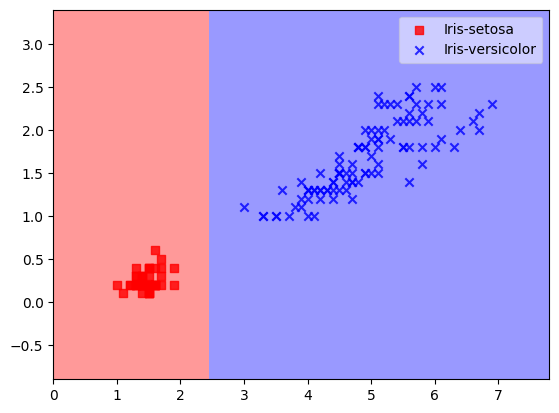

In [1005]:
# %pdb
print (" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(X[:,feat],Y,clf=dt, res=0.1, cycle_marker=True, legend=1)

In [1006]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape  ) 
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   )


 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


In [1007]:
# X

In [1008]:
# for i in range(X.shape[1]):
#     fv = X[: , i]
#     print(fv)
#     print('\n')

In [1009]:
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)

Building tree at depth 0 with purity 0.6730769230769231 and 104 examples
Building tree at depth 1 with purity 0.9444444444444444 and 36 examples
Building tree at depth 2 with purity 1.0 and 32 examples
Building tree at depth 2 with purity 0.5 and 4 examples
Building tree at depth 1 with purity 1.0 and 68 examples


In [1010]:
#Lets test it on the set of unseen examples...
pclasses=dt.predict(Xtest[:,feat])

In [1011]:
print (pclasses)

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']


Lets see how good we are doing...
==================

In [1012]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

41
Accuracy =  0.9111111111111111


 Plotting the Decision Surface of Training Set... 


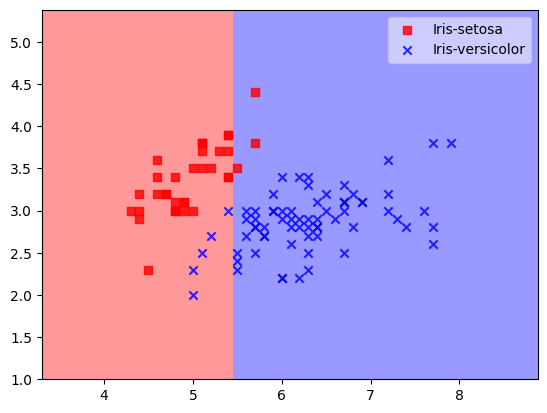

In [1013]:
#Lets plot the decision surface
print (" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(Xtrain[:,feat],Ytrain,clf=dt, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Test Set... 


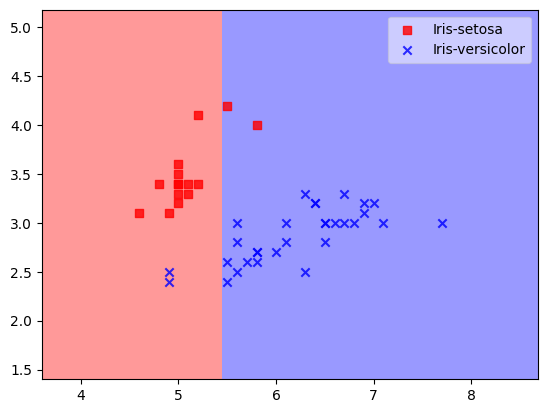

In [1014]:
print (" Plotting the Decision Surface of Test Set... ")
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=dt, res=0.02, cycle_marker=True, legend=1)

In [1015]:
from nose.tools import assert_greater_equal
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
assert_greater_equal(acc, 0.90)

Building tree at depth 0 with purity 0.6730769230769231 and 104 examples
Building tree at depth 1 with purity 0.9444444444444444 and 36 examples
Building tree at depth 2 with purity 1.0 and 32 examples
Building tree at depth 2 with purity 0.5 and 4 examples
Building tree at depth 1 with purity 1.0 and 68 examples


# Lets Train on all four features....

In [1016]:
#Lets Train on all four features....

# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain) 
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Building tree at depth 0 with purity 0.6730769230769231 and 104 examples
Building tree at depth 1 with purity 1.0 and 34 examples
Building tree at depth 1 with purity 1.0 and 70 examples
45
Accuracy =  1.0


# Lets Train on all four features and for all three classes....

In [1017]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [1018]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape )  
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape )  


 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


In [1019]:
feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Building tree at depth 0 with purity 0.33653846153846156 and 104 examples
Building tree at depth 1 with purity 1.0 and 34 examples
Building tree at depth 1 with purity 0.5 and 70 examples
Building tree at depth 2 with purity 1.0 and 31 examples
Building tree at depth 2 with purity 0.8974358974358975 and 39 examples
Building tree at depth 3 with purity 0.6666666666666666 and 6 examples
Building tree at depth 3 with purity 1.0 and 33 examples
43
Accuracy =  0.9555555555555556


In [1020]:
from nose.tools import assert_greater_equal

feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
assert_greater_equal(acc, 0.90)


Building tree at depth 0 with purity 0.33653846153846156 and 104 examples
Building tree at depth 1 with purity 1.0 and 34 examples
Building tree at depth 1 with purity 0.5 and 70 examples
Building tree at depth 2 with purity 1.0 and 31 examples
Building tree at depth 2 with purity 0.8974358974358975 and 39 examples
Building tree at depth 3 with purity 0.6666666666666666 and 6 examples
Building tree at depth 3 with purity 1.0 and 33 examples


What can you conclude ?
====================
Please write your observation....



# Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Now go and tune your hyper-parameters (purity, exthreshold) to opitmize the performance.

In [ ]:
# Now lets cross validate for best paramters, and test the result...
# We will be training four different models on four different partitions of data set and 
# then will be reporting the mean accuracy of the four classifiers.

nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[0,1, 2, 3] # features to use for our system
#now lets train and test on these folds...

#Lets perform the grid search...
purity=np.linspace(0.85,0.97,13) # You can also search over depth as well....
nexamp=np.linspace(5,25,21)  

params=np.zeros((len(purity),len(nexamp)))
                   
for p in range(len(purity)):
    for n in range(len(nexamp)):
        totacc=[]
        for k in range(nfolds):
            dt=DecisionTree(purity[p],nexamp[n])
            dt.train(folds[k][0][:,features],folds[k][1])
            pclasses=dt.predict(folds[k][2][:,features])
            acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
            print ("[Info] Fold {} Accuracy = {}".format(k+1, acc))
            totacc.append(acc)
        params[p,n]=np.mean(totacc)
        print (totacc, '\nPurity={}, Nexample-threshold={}, Mean Accuracy ={}'.format(purity[p],nexamp[n], np.mean(totacc)))

Generating CV data for 3 classes
Building tree at depth 0 with purity 0.336283185840708 and 113 examples
Building tree at depth 1 with purity 1.0 and 37 examples
Building tree at depth 1 with purity 0.5 and 76 examples
Building tree at depth 2 with purity 0.95 and 40 examples
Building tree at depth 2 with purity 1.0 and 36 examples
[Info] Fold 1 Accuracy = 0.9444444444444444
Building tree at depth 0 with purity 0.336283185840708 and 113 examples
Building tree at depth 1 with purity 1.0 and 37 examples
Building tree at depth 1 with purity 0.5 and 76 examples
Building tree at depth 2 with purity 0.95 and 40 examples
Building tree at depth 2 with purity 1.0 and 36 examples
[Info] Fold 2 Accuracy = 0.9444444444444444
Building tree at depth 0 with purity 0.336283185840708 and 113 examples
Building tree at depth 1 with purity 1.0 and 37 examples
Building tree at depth 1 with purity 0.5 and 76 examples
Building tree at depth 2 with purity 1.0 and 35 examples
Building tree at depth 2 with puri

In [979]:
np.save('dt-cv',params)

In [980]:
print (params)

[[0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889]
 [0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889]
 [0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889]
 [0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889 0.95138889 0.95138889 0.95138889
  0.95138889 0.95138889 0.95138889]
 [0.95138889 0.95138889 0.95138889 0.951

In [981]:
print (params.shape)

(13, 21)


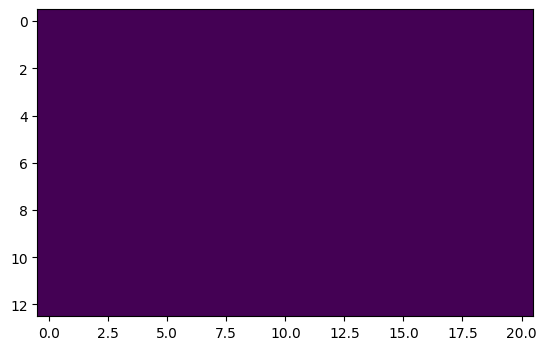

In [982]:
plt.imshow(params) # displayc the accuracy as 2D image...

In [1024]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
tX, tY = np.meshgrid(purity, nexamp)
ax.plot_surface(tX,tY,params.T)
ax.set_xlabel('Purity')
ax.set_ylabel('Nexamples')
ax.set_zlabel('Mean Accuracy across {}-Folds'.format(nfolds))
# ax.scatter3D(data['SepalLength'],data['PetalLength'],data['PetalWidth'])
#(params,ax,'Purity','Example-Threshold','Mean-Accuracy')

Text(0.5, 0, 'Mean Accuracy across 4-Folds')

<Figure size 640x480 with 0 Axes>

In [1025]:
print (params.shape, tX.shape, tY.shape)

(13, 21) (21, 13) (21, 13)


In [1026]:
#print the row and column  index of m
#single line code
ridx,cidx= np.unravel_index(np.argmax(params), params.shape)

# simple step-wise code

cidx=np.argmax(params.max(axis=0))
ridx=np.argmax(params[:,cidx])
print (ridx, cidx)

0 0


In [1027]:
print ('CV Best Parameters are, purity={}, nexamp={}, mean accuracy={}'.format(purity[ridx],nexamp[cidx],params[ridx,cidx]))

CV Best Parameters are, purity=0.85, nexamp=5.0, mean accuracy=0.9513888888888888


In [1029]:
print(purity[ridx],nexamp[cidx])
dt=DecisionTree(purity[ridx],nexamp[cidx])
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

0.85 5.0
Building tree at depth 0 with purity 0.33653846153846156 and 104 examples
Building tree at depth 1 with purity 1.0 and 34 examples
Building tree at depth 1 with purity 0.5 and 70 examples
Building tree at depth 2 with purity 1.0 and 31 examples
Building tree at depth 2 with purity 0.8974358974358975 and 39 examples
42
Accuracy =  0.9333333333333333


In [1030]:
print (dt.find_depth())

AxisError: axis 1 is out of bounds for array of dimension 0

In [1031]:
print (dt)


        C(class=Iris-virginica,Purity=0.8974358974358975)
    I(Fidx=2,Score=0.7342031293920877,Split=4.75)
        C(class=Iris-versicolor,Purity=1.0)
I(Fidx=2,Score=0.9117517586347537,Split=2.45)
    C(class=Iris-setosa,Purity=1.0)
